# Imports and data

In [293]:
import argparse
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from utils import *
from classifiers import *
from preprocess import  preprocess
import matplotlib.pyplot as plt
import math
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [294]:
seed = 42
random.seed(seed)
raw = pd.read_csv('C:/Users/jordi/Documents/GitHub/MUD_Labs_Git/LangDetect/data/dataset.csv')
voc_size = 1

# Split

In [295]:
# list with all the languages (unique)
languages = set(raw['language']) 

# Split Train and Test sets
X=raw['Text']
y=raw['language']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


In [296]:
# save the raw test set to check bad labaled data
x_test_raw_2 = X_test

# Procesar words

In [297]:
# Preprocess text (Word granularity only)
analyzer = 'char'
if analyzer == 'word':
    X_train, y_train = preprocess(X_train,y_train)
    X_test, y_test = preprocess(X_test,y_test)

# Vectorize the text

In [298]:
# Vectorize the text
unigramVectorizer = CountVectorizer(analyzer=analyzer, max_features=50000, ngram_range=(1,3))
X_unigram_train_raw = unigramVectorizer.fit_transform(X_train)
X_unigram_test_raw = unigramVectorizer.transform(X_test)
unigramFeatures = unigramVectorizer.get_feature_names()
print('length of the vector:' + str(len(unigramFeatures)))

# change variables names
features = unigramFeatures      # features names
X_train_raw = X_unigram_train_raw
X_test_raw = X_unigram_test_raw

# for i in X_unigram_train_raw.toarray():
#     print(i)

length of the vector:50000


c:\Users\jordi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
# # Uni- & Bi-Gram Mixture CountVectorizer for top 1% features
# top1PrecentMixtureVectorizer = CountVectorizer(analyzer='char', ngram_range=(1,1), min_df=1e-2)
# X_top1Percent_train_raw = top1PrecentMixtureVectorizer.fit_transform(X_train)
# X_top1Percent_test_raw = top1PrecentMixtureVectorizer.transform(X_test)

In [143]:
print('========')
print('Number of tokens in the vocabulary:', len(features))
print('Coverage: ', compute_coverage(features, X_test.values, analyzer=analyzer))
print('========')

Number of tokens in the vocabulary: 250
Coverage:  0.827842160343621


In [20]:
# coverage_plot_2 = []

# for i in range(1,10000,300):
#     voc_size = i
#     #Compute text features
#     analyzer = 'word'
#     unigramVectorizer = CountVectorizer(analyzer=analyzer,max_features=voc_size)
#     X_unigram_train_raw = unigramVectorizer.fit_transform(X_train)
#     X_unigram_test_raw = unigramVectorizer.transform(X_test)
#     unigramFeatures = unigramVectorizer.get_feature_names()

#     coverage_plot_2.append(compute_coverage(unigramFeatures, X_test.values, analyzer=analyzer))

#     print(str(i))
#     print(coverage_plot_2[-1])


In [ ]:
# coverage_plot = [15.194378278428026, 93.67813140035825, 96.66568220194796, 97.83914274524406, 98.46031858134354, 98.86782277066895, 99.1482026028391, 99.34261298337753, 99.49779458501602, 99.61612296392364, 99.69888220451612, 99.76385687595103, 99.8125878795272, 99.85123882044006, 99.87852561427388, 99.90041925356174, 99.91968051979737, 99.93162250486347, 99.94272983505935, 99.9492144613587, 99.9535803483721, 99.95884509447652, 99.96333938993149, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233]
# coverage_plot_2  = [1.7058206150412556, 19.321156406990877, 22.84397466159456, 25.195700601932323, 26.95462069137175, 28.404070406584335, 29.59009694802474, 30.620558623064255, 31.679644233521532, 32.63211605553873, 33.46096566372269, 34.21970737211531, 34.920786370028665, 35.51691093807688, 36.17484661304173, 36.72948721671638, 37.30777368008396, 37.78732830824245, 38.28057264464421, 38.72320654451022, 39.1737223976072, 39.604325947804874, 40.007550081515994, 40.355185702966516, 40.70862907942935, 41.06414665411086, 41.4084635584115, 41.77144824668025, 42.11535031133715, 42.44016975238222, 42.72516458762865, 43.00767038501267, 43.28685746524681, 43.53617609113197]

# # plot the coverage of the vocabulary
# plt.plot(range(1,10000,300),coverage_plot[:], '-r', label = 'Unigrams')
# plt.plot(range(1,10000,300),coverage_plot_2[:], '-g', label = 'Words')
# # plt.axvline(x = 1000, color = 'b', label = 'axvline - full height')
# plt.xlabel('Vocabulary size')
# plt.ylabel('% Coverage')
# plt.grid()
# plt.title('Coverage of the vocabulary')
# plt.legend()
# plt.show()

# Significance per language

In [22]:
# Aggregate Unigrams per language   (funcio agafada del kaggle)
def train_lang_dict(X_raw_counts, y_train):
    '''Returns a dictionary with the relative frequency of each feature per language.'''

    lang_dict = {}
    for i in range(len(y_train)):
        lang = y_train[i]
        v = np.array(X_raw_counts[i])
        if not lang in lang_dict:
            lang_dict[lang] = v
        else:
            lang_dict[lang] += v
            
    # to relative
    for lang in lang_dict:
        v = lang_dict[lang]
        lang_dict[lang] = v / np.sum(v)
        
    return lang_dict

# Collect relevant chars per language  (funcio agafada del kaggle i modificada)
def getRelevantCharsPerLanguage(features, language_dict, significance=1e-5):
    relevantCharsPerLanguage = {}
    relevantCharsPerLanguage_w_significance = {}

    for lang in languages:
        chars = []
        significance_chars = {}
        relevantCharsPerLanguage[lang] = chars
        relevantCharsPerLanguage_w_significance[lang] = significance_chars
        v = language_dict[lang]
        for i in range(len(v)):
            if v[i] > significance:
                chars.append(features[i])
                significance_chars[features[i]] = v[i]
    return relevantCharsPerLanguage, relevantCharsPerLanguage_w_significance

language_dict_unigram = train_lang_dict(X_unigram_train_raw.toarray(), y_train.values)

relevantCharsPerLanguage, relevantCharsPerLanguage_significance = getRelevantCharsPerLanguage(unigramFeatures, language_dict_unigram)

# Convert to dic
languages_num_ngrams = {}
for lang in languages:    
    languages_num_ngrams[lang] = len(relevantCharsPerLanguage[lang])

# Order a dictionary by value
def sortDictByValue(d):
    return {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}

languages_num_ngrams = sortDictByValue(languages_num_ngrams)

languages_num_ngrams

# plot an histogram with the number of unigrams per language
# plt.bar(languages_num_ngrams.keys(), languages_num_ngrams.values(), color='g')
# plt.show()

{'Dutch': 49,
 'English': 50,
 'Spanish': 55,
 'Portugese': 58,
 'French': 58,
 'Indonesian': 67,
 'Swedish': 68,
 'Russian': 74,
 'Estonian': 82,
 'Romanian': 85,
 'Arabic': 85,
 'Persian': 87,
 'Turkish': 87,
 'Latin': 89,
 'Tamil': 96,
 'Hindi': 101,
 'Urdu': 109,
 'Pushto': 127,
 'Thai': 128,
 'Chinese': 433,
 'Japanese': 485,
 'Korean': 507}

In [23]:
# get most common chars for a few European languages
europeanLanguages = ['Dutch', 'English', 'Latin', 'Indonesian', 'Estonian', 'Pushto', 'Spanish', 'French', 'Chinese', 'Urdu', 'Turkish', 'Persian']
europeanLanguages = ['Dutch', 'English', 'Latin', 'Indonesian', 'Estonian', 'Pushto', 'Spanish', 'French', 'Chinese', 'Urdu', 'Turkish', 'Persian']

relevantChars_OnePercent = getRelevantCharsPerLanguage(unigramFeatures, language_dict_unigram, 1e-2)


# collect and sort chars
europeanCharacters = []
for lang in europeanLanguages:
    europeanCharacters += relevantChars_OnePercent[lang]
europeanCharacters = list(set(europeanCharacters))
europeanCharacters.sort()

# build data
indices = [unigramFeatures.index(f) for f in europeanCharacters]
data = []
for lang in europeanLanguages:
    data.append(language_dict_unigram[lang][indices])

#build dataframe
df = pd.DataFrame(np.array(data).T, columns=europeanLanguages, index=europeanCharacters)
df.index.name = 'Characters'
df.columns.name = 'Languages'

# plot heatmap
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=0.8) # for label size
sn.set(rc={'figure.figsize':(10, 10)})
sn.heatmap(df, cmap="Greens", annot=True, annot_kws={"size": 8}, fmt='.0%')# font size
plt.show()

TypeError: tuple indices must be integers or slices, not str

In [46]:
# Plots de significancia de los unigramas por idioma
for i in relevantCharsPerLanguage_significance.keys():
    relevantCharsPerLanguage_significance[i] = {k: v for k, v in sorted(relevantCharsPerLanguage_significance[i].items(), key=lambda item: item[1], reverse=True)}


# for i in relevantCharsPerLanguage_significance.keys():
#     # add title
#     plt.xlabel("Unigrams")
#     plt.ylabel("Significance")
#     plt.title(i)
#     plt.plot(relevantCharsPerLanguage_significance[i].keys(), relevantCharsPerLanguage_significance[i].values(), color='b')
#     plt.savefig('C:/Users/jordi/Documents/GitHub/MUD_Labs_Git/LangDetect/figures/'+i+'.jpg')
#     # plt.show()
#     # save figure


# Normalize and Classifier

In [299]:
X_train, X_test = normalizeData(X_train_raw, X_test_raw)


In [273]:
#Apply Classifier  
y_predict = applyNaiveBayes(X_train, y_train, X_test)

print('========')
print('Prediction Results:')    
plot_F_Scores(y_test, y_predict)
print('========')

Prediction Results:
F1: 0.9731818181818181 (micro), 0.9742260835094996 (macro), 0.9742278266157655 (weighted)


In [274]:
# apply decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)


plot_F_Scores(y_test, y_predict)

F1: 0.9531818181818181 (micro), 0.9532318749572434 (macro), 0.9531904692976092 (weighted)


0.9531904692976092

In [288]:
# apply random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

plot_F_Scores(y_test, y_predict)

F1: 0.9804545454545455 (micro), 0.9810189060478245 (macro), 0.9810227965356209 (weighted)


0.9810227965356209

In [276]:
# apply SVM classifier
clf = svm.SVC()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

plot_F_Scores(y_test, y_predict)

F1: 0.9788636363636364 (micro), 0.9793207571300916 (macro), 0.97927868906929 (weighted)


0.97927868906929

# Analize results of the classifier

In [291]:
# detect wrong predicted data
for i in range(len(y_predict)):
    if y_test.iloc[i] != y_predict[i] and (y_test.iloc[i] == 'Latin' and y_predict[i] == 'Dutch') or (y_test.iloc[i] == 'Dutch' and y_predict[i] == 'Latin'):
        print('Predicted: ', y_predict[i], ' Actual: ', y_test.iloc[i], ' Text: ', x_test_raw_2.iloc[i])
        print('')

Predicted:  Dutch  Actual:  Latin  Text:  lugge margret  "gallia" et "francia" im mittelalter untersuchungen über den zusammengang zwischen geographisch-historischer terminologie und politischem denken vom - jahrhundert bonnae

Predicted:  Latin  Actual:  Dutch  Text:  atkins diabetes revolution postuum verschenen in  als co-auteur staan vermeld mary c vernon md cmc en jacqueline a eberstein rn



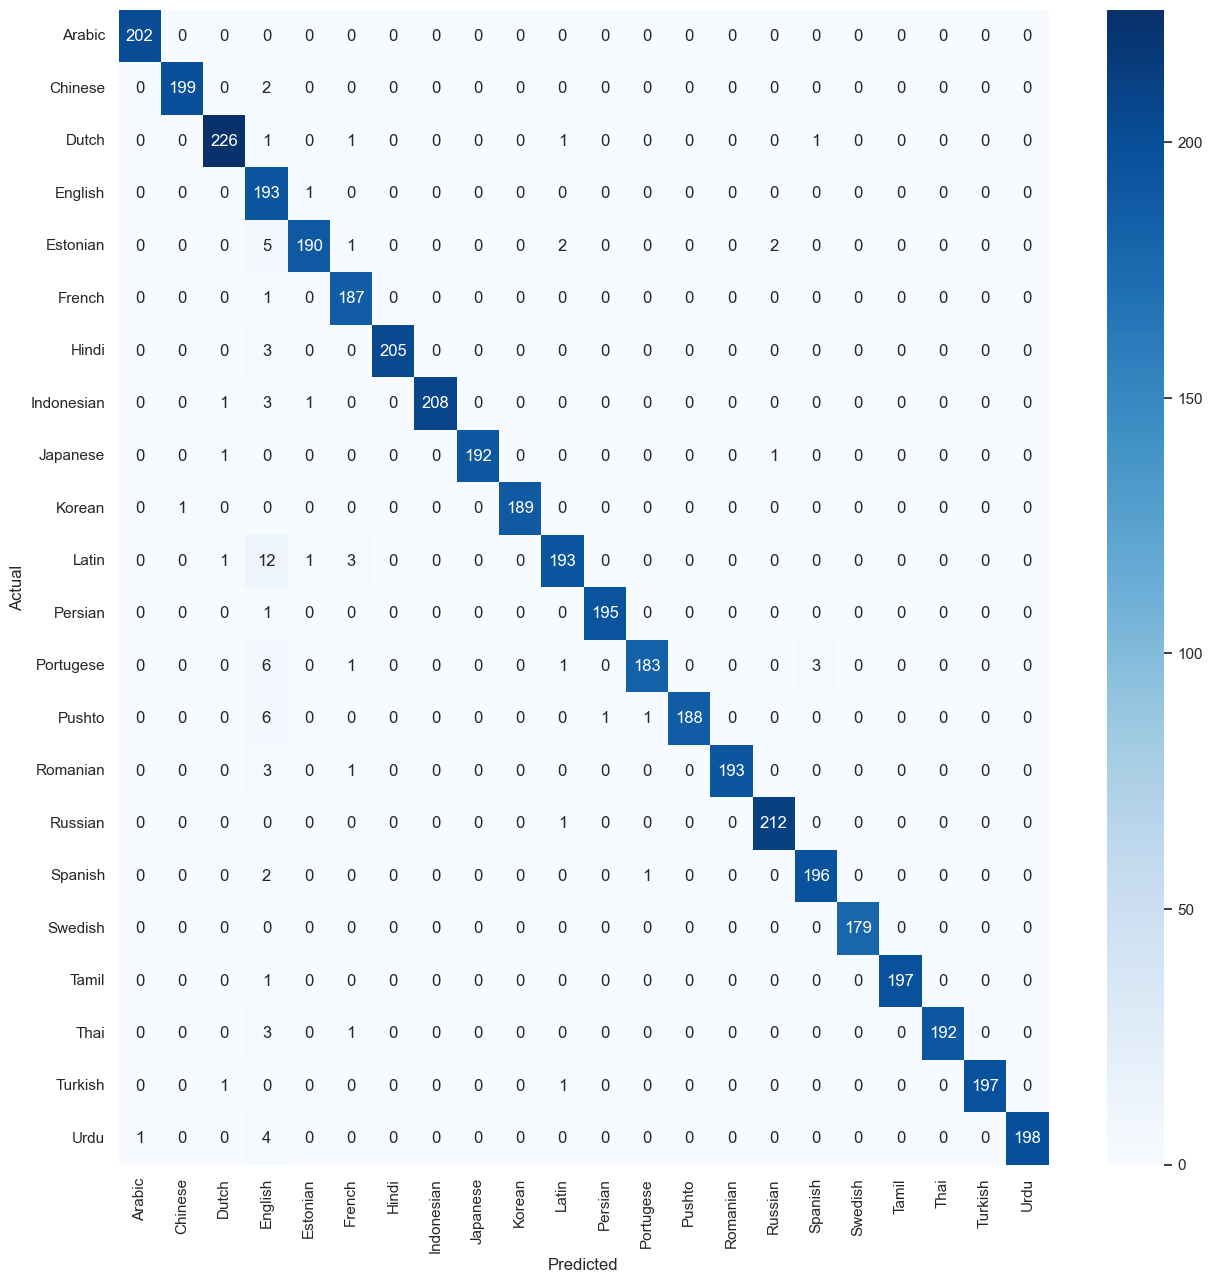

In [289]:
# plot confusion matrix
plot_Confusion_Matrix(y_test, y_predict, "Blues") 

# PCA analize

In [302]:
#Plot PCA
print('========')
print('PCA and Explained Variance:') 
# plotPCA(X_train, X_test,y_test, languages) 

pca = PCA(n_components=1000)
pca.fit(toNumpyArray(X_train))
pca_test = pca.transform(toNumpyArray(X_test))
pca_train = pca.transform(toNumpyArray(X_train))

print('Variance explained by PCA:', pca.explained_variance_ratio_)

y_test_list = np.asarray(y_test.tolist())
for lang in languages:
    pca_x = np.asarray([i[0] for i in pca_test])[y_test_list == lang]
    pca_y = np.asarray([i[1] for i in pca_test])[y_test_list == lang]
    plt.scatter(pca_x,pca_y, label=lang)
plt.legend(loc="upper left")
plt.show()

PCA and Explained Variance:


ValueError: n_components=1000 must be between 0 and min(n_samples, n_features)=100 with svd_solver='full'

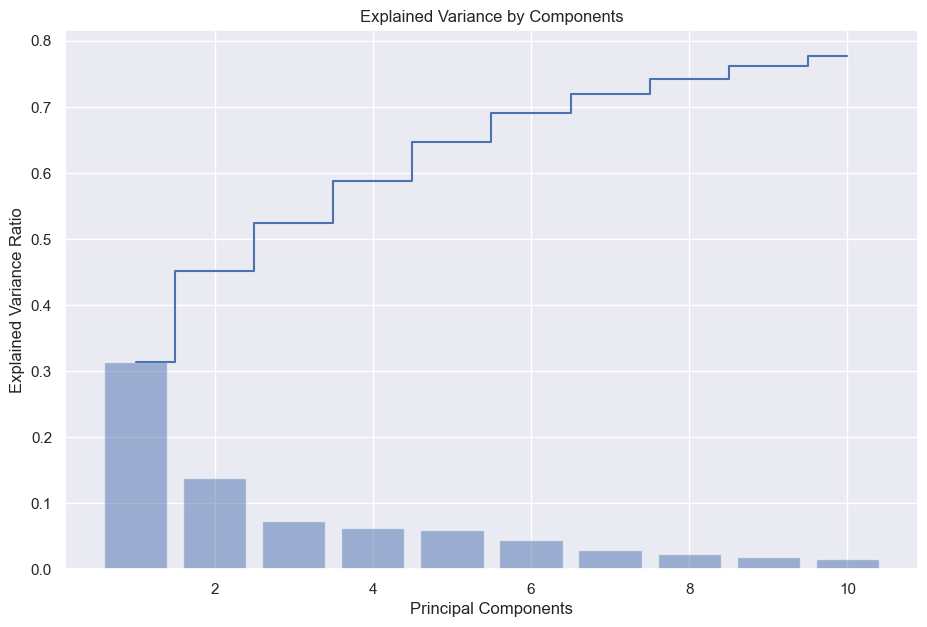

In [71]:
# get explained variance ratio
exp_var = pca.explained_variance_ratio_

# plot explained variance ratio
plt.figure(figsize=(11, 7))
plt.bar(range(1, 11), exp_var, alpha=0.5, align='center')
plt.step(range(1, 11), np.cumsum(exp_var), where='mid')
plt.title('Explained Variance by Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


# PCA classifier

In [301]:
X_train, X_test = normalizeData(pca_train, pca_test)
#Apply Classifier  
clf = MultinomialNB()
clf.fit(X_train + 1, y_train)
y_predict = clf.predict(X_test + 1)

print('========')
print('Prediction Results:')    
plot_F_Scores(y_test, y_predict)
print('========') 

Prediction Results:
F1: 0.9577272727272728 (micro), 0.9582355363161092 (macro), 0.9583370204477354 (weighted)


# Plots performance of different models

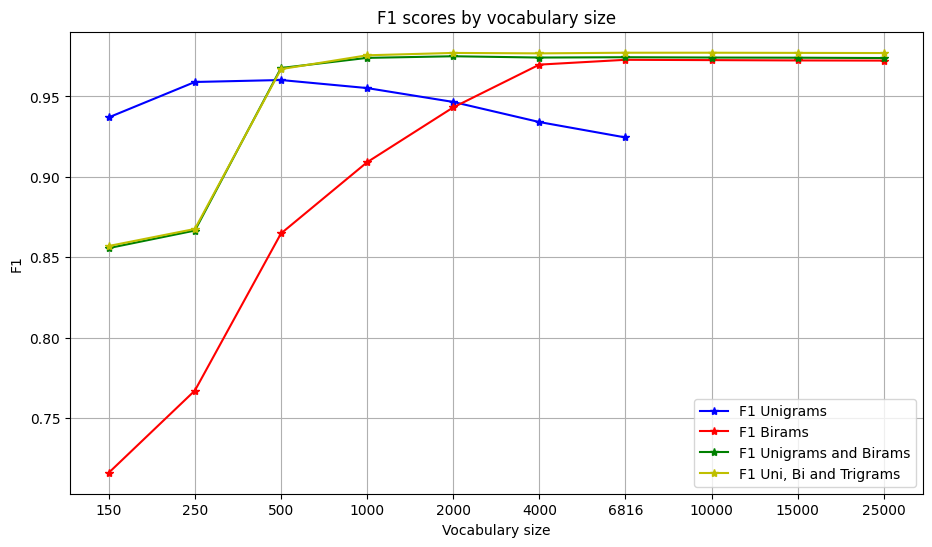

In [230]:
unigrams_plot_f1 = {'150':0.937, '250': 0.959,'500': 0.96022,'1000':0.95522,'2000':0.94659,'4000': 0.93409,'6816': 0.9245}
birams_plot_f1 = {'150': 0.7160, '250':  0.7671,'500':  0.8648,'1000': 0.9091,'2000': 0.9432,'4000':  0.9698,'6816':  0.9728, '10000': 0.9726, '15000': 0.9724, '25000':0.9723}
unigrams_and_birams_plot_f1 = {'150': 0.8557, '250': 0.8666,'500': 0.9677,'1000': 0.9740,'2000':  0.9750,'4000': 0.9742,'6816':  0.9744, '10000': 0.9742, '15000': 0.9741, '25000': 0.9739}
trigrams_plot_f1 = {'150': 0.8570, '250': 0.8676,'500': 0.9670,'1000': 0.9756,'2000':  0.97707,'4000': 0.9768,'6816':  0.9772, '10000': 0.9772, '15000': 0.9771, '25000': 0.9770}

plt.figure(figsize=(11, 6))
plt.plot(unigrams_plot_f1.keys(), unigrams_plot_f1.values(), '-*b', label='F1 Unigrams')
plt.plot(birams_plot_f1.keys(), birams_plot_f1.values(), '-*r', label='F1 Birams')
plt.plot(unigrams_and_birams_plot_f1.keys(), unigrams_and_birams_plot_f1.values(), '-*g', label='F1 Unigrams and Birams')
plt.plot(trigrams_plot_f1.keys(), trigrams_plot_f1.values(), '-*y', label='F1 Uni, Bi and Trigrams')
plt.xlabel('Vocabulary size')
plt.ylabel('F1')
plt.title('F1 scores by vocabulary size')
plt.legend()
plt.grid()
plt.show()

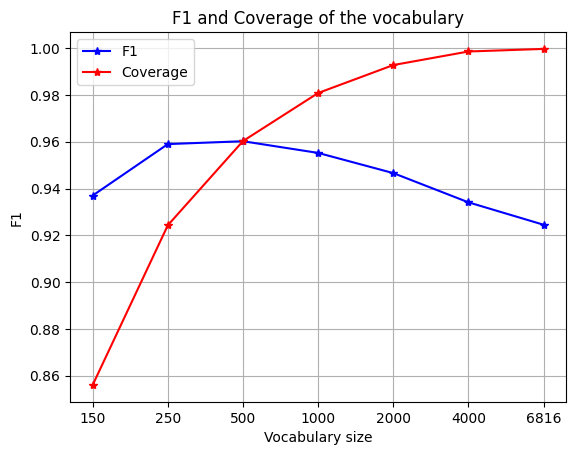

In [101]:
unigrams_plot_f1 = {'150':0.937, '250': 0.959,'500': 0.96022,'1000':0.95522,'2000':0.94659,'4000': 0.93409,'6816': 0.9245}
unigrams_plot_coverage = {'150':0.8560, '250': 0.9243, '500': 0.9603, '1000': 0.98085, '2000':0.9928, '4000': 0.9986, '6816': 0.9997}

plt.plot(unigrams_plot_f1.keys(), unigrams_plot_f1.values(), '-*b', label='F1')
plt.plot(unigrams_plot_coverage.keys(), unigrams_plot_coverage.values(), '-*r', label='Coverage')
plt.xlabel('Vocabulary size')
plt.ylabel('F1')
plt.title('F1 and Coverage of the vocabulary')
plt.legend()
plt.grid()
plt.show()